# Digital Property Platform Launch Shows Limited Impact on Real Estate Agents

## Analysis of Singapore's HDB Resale Portal Implementation

**Summary:** An analysis of property transaction data from 2017-2020 reveals that Singapore's HDB Resale Portal, launched in January 2018, had minimal long-term impact on real estate agent activity. Despite initial concerns about digital disruption, agent transaction volumes and participation rates returned to growth trajectories within months of the platform's introduction.

---

### Key Findings:
- **Temporary disruption**: A brief decline in agent activity occurred in March 2018, two months after portal launch
- **Market recovery**: Agent activity levels exceeded pre-portal benchmarks by 2019-2020
- **Price stability**: Property prices remained stable throughout the digital transition period
- **Market growth**: Overall transaction volumes increased significantly in the post-portal period

---

### Background

In January 2018, Singapore's Housing and Development Board (HDB) launched an online resale portal designed to streamline property transactions. The platform was intended to reduce complexity and costs in the resale process, potentially reducing dependence on traditional real estate agents.

Industry observers anticipated significant disruption to the established agent-mediated transaction model, with concerns that digital platforms would substantially reduce demand for professional intermediary services.

### Research Questions

1. How did total transaction volumes change following portal implementation?
2. What was the impact on individual agent productivity and market participation?
3. Did the digital platform affect property pricing trends?
4. What can these findings tell us about digital disruption in traditional service industries?


### Methodology and Data Sources

This analysis examines transaction records from two primary sources:

**Transaction Data**: Council for Estate Agencies (CEA) residential property transaction records covering the period from January 2017 through December 2020. The dataset includes 174,000+ individual transactions with agent involvement.

**Price Data**: HDB official resale price records for the same period, providing market-wide pricing trends across different property types.

**Analysis Period**: The study focuses on 2017-2020 to capture pre-portal baseline conditions, immediate implementation effects, and subsequent market adaptation, while avoiding pandemic-related market distortions that began in 2021.

In [1]:
import os
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append("..")

from src.utils import analyze_time_series

In [3]:
DATA_DIR = Path(os.getcwd()).parent / "data"
AGENT_TRANSACTIONS_PATH = DATA_DIR / "CEASalespersonsPropertyTransactionRecordsresidential.csv"
RESALE_PRICES_PATH = DATA_DIR / "ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"

In [4]:
agent_transactions = pd.read_csv(AGENT_TRANSACTIONS_PATH)
agent_transactions.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,SOH HUI HUA,OCT-2017,P000003I,HDB,RESALE,SELLER,YISHUN,-,-
1,SOH HUI HUA,MAR-2018,P000003I,HDB,RESALE,BUYER,KALLANG/WHAMPOA,-,-
2,SOH HUI HUA,JAN-2017,P000003I,HDB,RESALE,BUYER,YISHUN,-,-
3,SOH HUI HUA,MAY-2018,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-
4,SOH HUI HUA,NOV-2017,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-


In [5]:
agent_transactions.describe()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
count,1182116,1182116,1182116,1182116,1182116,1182116,1182116,1182116,1182116
unique,30440,103,30872,5,5,4,29,29,34
top,"KUAH KAI PIN, KAVIN",JUL-2024,R043039D,CONDOMINIUM_APARTMENTS,WHOLE RENTAL,LANDLORD,-,-,-
freq,2816,20877,2816,578707,560785,526287,648912,487309,487309


In [6]:
# Covert transaction_date to datetime
agent_transactions["transaction_date"] = pd.to_datetime(agent_transactions["transaction_date"])

# Get min and max transaction_date
min_date = agent_transactions["transaction_date"].min()
max_date = agent_transactions["transaction_date"].max()

print(f"Min date: {min_date}")
print(f"Max date: {max_date}")


Min date: 2017-01-01 00:00:00
Max date: 2025-07-01 00:00:00


/var/folders/0_/_8kds0vn7bz_q6bx4p5fy0cc0000gn/T/ipykernel_78554/3492942650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agent_transactions["transaction_date"] = pd.to_datetime(agent_transactions["transaction_date"])


In [7]:
# Filter out transactions after 2020 due to anomalous post-COVID surge
agent_transactions = agent_transactions[agent_transactions['transaction_date'].dt.year <= 2020]

# Get min and max transaction_date
min_date = agent_transactions["transaction_date"].min()
max_date = agent_transactions["transaction_date"].max()

print(f"Min date: {min_date}")
print(f"Max date: {max_date}")

Min date: 2017-01-01 00:00:00
Max date: 2020-12-01 00:00:00


### Transaction Volume Analysis
Rather than the immediate, sustained decline many predicted, Singapore's property agent market experienced a brief, synchronized dip across all key metrics in March 2018—two months after the portal's January launch.

Examination of monthly transaction data shows total agent-mediated transactions dropped notably in March 2018, falling just within statistical confidence intervals. However, this decline proved temporary, with volumes recovering by mid-2018 and subsequently reaching levels 140% higher than pre-portal baselines.

**Technical Note:** Analysis uses LOESS trend smoothing with bootstrapped confidence intervals. Confidence intervals were set at 80%; owing to limited post-portal data, the usual 95% gave error bounds that were too large to be useful for analysis.

/var/folders/0_/_8kds0vn7bz_q6bx4p5fy0cc0000gn/T/ipykernel_78554/3843916362.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = agent_transactions.groupby(pd.Grouper(key='transaction_date', freq='M')).size()


Trend Analysis around 2018-01-01:
  Pre-period average: 2566.8
  Post-period average: 6150.3
  Change: +3583.5
  Pre-period volatility: 159.1
  Post-period volatility: 2467.5
  Average CI width: 2426.7
  Trend change magnitude vs CI width: 1.48


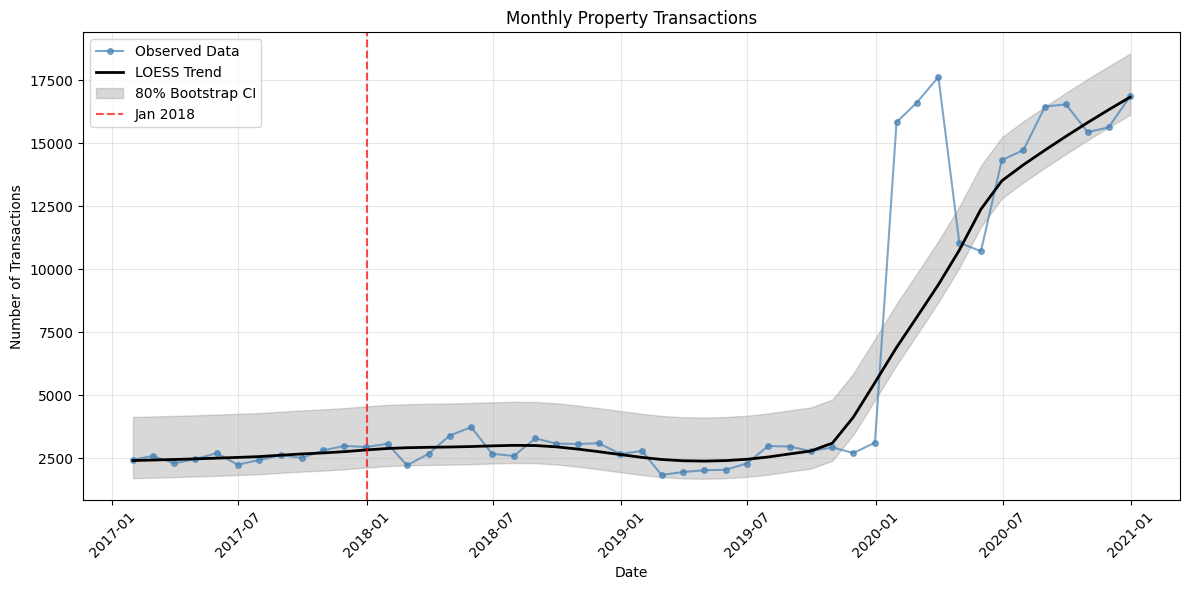

In [8]:
# Aggregate total transactions per month and plot against time
monthly_transactions = agent_transactions.groupby(pd.Grouper(key='transaction_date', freq='M')).size()

results, fig = analyze_time_series(
    monthly_transactions, 
    "Monthly Property Transactions",
    ylabel="Number of Transactions"
)

### Agent Productivity Impact  

Individual agent productivity followed a similar pattern. Average transactions per agent declined marginally in March 2018, with the dip falling just beyond 80% confidence intervals, suggesting possible statistical significance. However, recovery was swift, with per-agent activity exceeding pre-portal levels by mid-2018.

/var/folders/0_/_8kds0vn7bz_q6bx4p5fy0cc0000gn/T/ipykernel_78554/2981440709.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agent_counts = agent_transactions.groupby([pd.Grouper(key='transaction_date', freq='M'), 'salesperson_reg_num']).size()


Trend Analysis around 2018-01-01:
  Pre-period average: 1.4
  Post-period average: 1.6
  Change: +0.2
  Pre-period volatility: 0.0
  Post-period volatility: 0.1
  Average CI width: 0.2
  Trend change magnitude vs CI width: 0.97


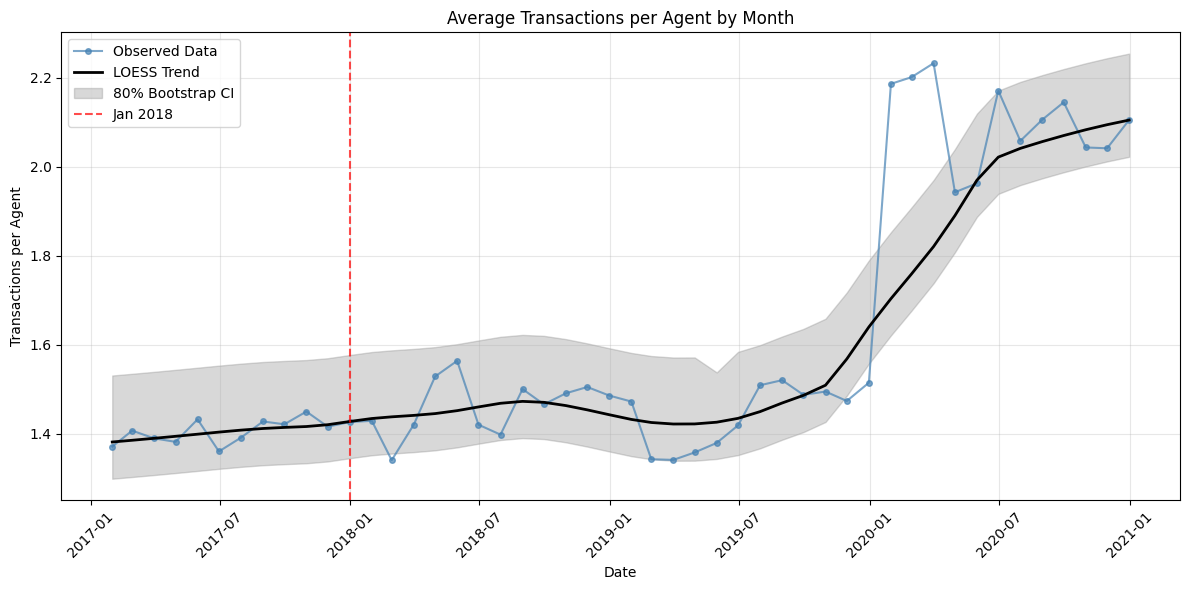

In [9]:
# Calculate average transactions per agent per month
monthly_agent_counts = agent_transactions.groupby([pd.Grouper(key='transaction_date', freq='M'), 'salesperson_reg_num']).size()
avg_transactions_per_agent = monthly_agent_counts.groupby('transaction_date').mean()

results, fig = analyze_time_series(
    avg_transactions_per_agent, 
    "Average Transactions per Agent by Month",
    ylabel="Transactions per Agent"
)

### Market Participation Trends

The number of active agents per month similarly showed a decline in March 2018, though still within margin of error. Subsequently, the number active agent counts recovered strongly from pre-portal levels, suggesting market expansion rather than contraction.

Trend Analysis around 2018-01-01:
  Pre-period average: 1827.9
  Post-period average: 3437.8
  Change: +1609.9
  Pre-period volatility: 97.1
  Post-period volatility: 943.4
  Average CI width: 1076.8
  Trend change magnitude vs CI width: 1.50


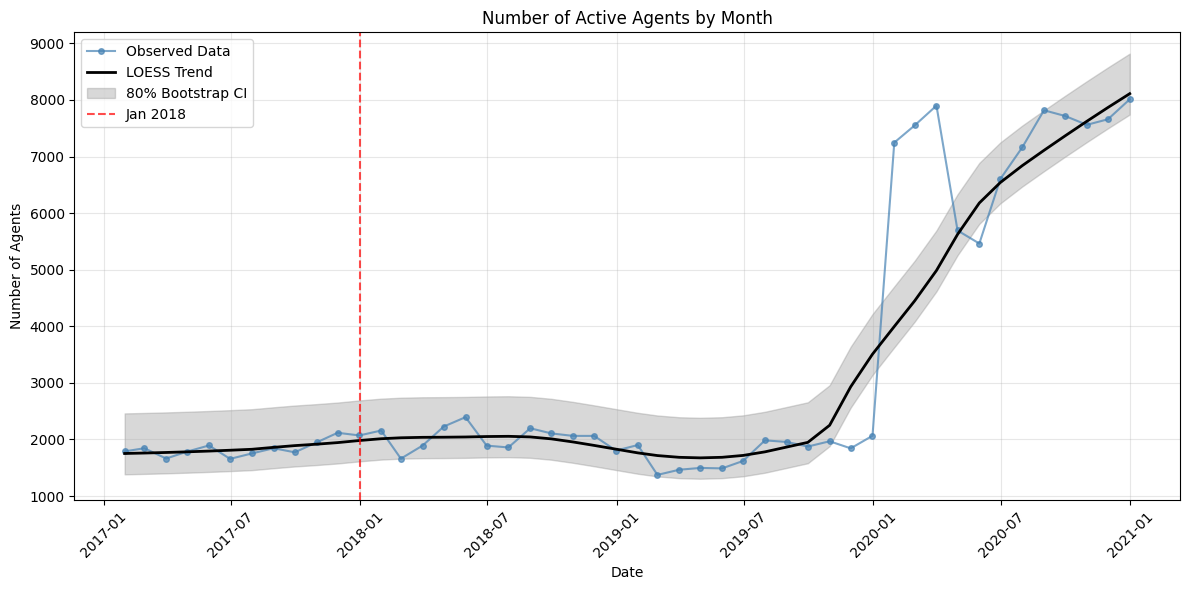

In [10]:
# Calculate number of unique agents per month and plot trend
monthly_unique_agents = agent_transactions.groupby(pd.Grouper(key='transaction_date', freq='ME'))['salesperson_reg_num'].nunique()

results, fig = analyze_time_series(
    monthly_unique_agents, 
    "Number of Active Agents by Month",
    ylabel="Number of Agents"
)

### Price Impact Assessment

Despite widespread expectations that digital platform efficiency would drive down transaction costs and property prices, market pricing remained remarkably stable across all flat types throughout the portal implementation period.

In [11]:
resale_prices = pd.read_csv(RESALE_PRICES_PATH)
resale_prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [12]:
# covert month to datetime
resale_prices["month"] = pd.to_datetime(resale_prices["month"])
# Exclude all resale prices after 2020 to focus on pre-pandemic trends
resale_prices = resale_prices[resale_prices['month'].dt.year < 2020]

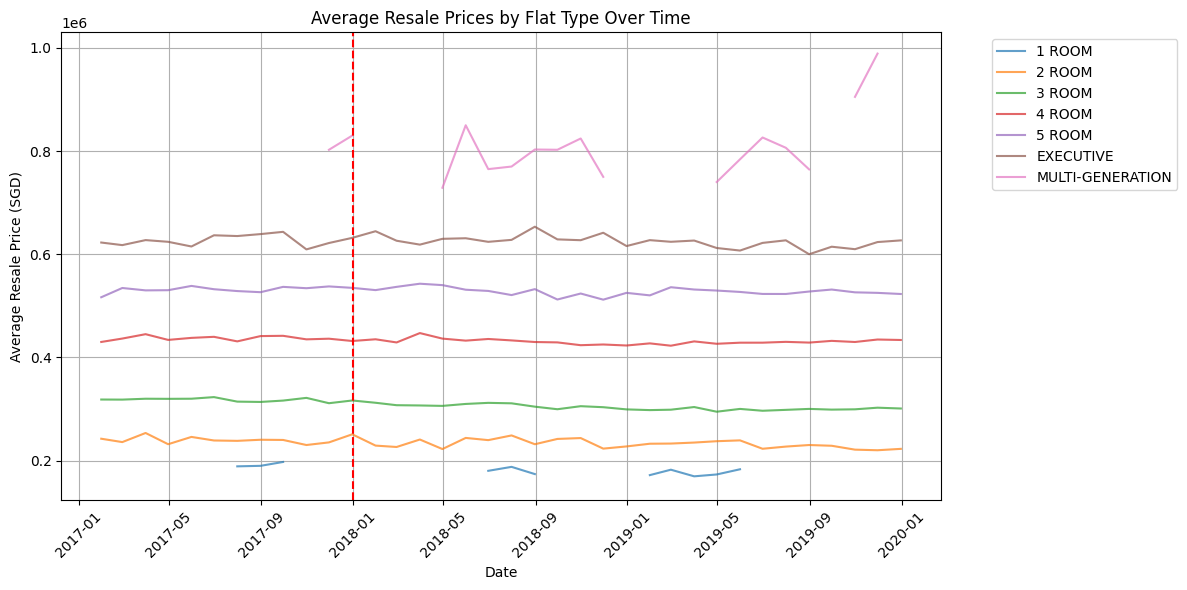

In [13]:
# Calculate average resale prices by flat type and month
monthly_prices_by_type = resale_prices.groupby([pd.Grouper(key='month', freq='ME'), 'flat_type'])['resale_price'].mean().unstack()

# Plot the trends
plt.figure(figsize=(12,6))
for flat_type in monthly_prices_by_type.columns:
    plt.plot(monthly_prices_by_type.index, monthly_prices_by_type[flat_type], label=flat_type, alpha=0.7)

plt.axvline(x=pd.to_datetime('2018-01-01'), color='r', linestyle='--')  # Add vertical line at Jan 2018
plt.title('Average Resale Prices by Flat Type Over Time')
plt.xlabel('Date') 
plt.ylabel('Average Resale Price (SGD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusions

The anticipated disruption by the HDB Resale Portal did not materialize. Possible reasons include:

- **Market Complexity**: Property transactions retained inherent complexity requiring professional expertise despite digital streamlining.
- **Agent Adaptation**: Professionals repositioned themselves as advisors for both traditional processes and new digital requirements.
- **Market Expansion**: The portal reduced bureaucratic friction, potentially stimulating more transactions and creating additional opportunities for agent involvement.